In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
d=pd.read_csv('supermarket.csv',encoding="ISO-8859-1")

In [4]:
d

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [62]:
d.shape

(1000, 15)

In [9]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
d.isnull().sum().sum()

0

In [13]:
d=d.drop(['Invoice ID','Date','Time'],axis=1)

In [14]:
d

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#cogs-cost of goods sold

In [15]:
#check unique values in gross margin percentage
d['gross margin percentage'].unique()

array([4.76190476])

In [16]:
#does not have any unique values..so we can drop this column

d=d.drop(['gross margin percentage'],axis=1)

In [17]:
d

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,3.2910,4.1


## Data Visualisation

In [20]:
d.shape

(1000, 13)

In [19]:
d['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [25]:
d['Gender'].value_counts()/len(d)*100

Female    50.1
Male      49.9
Name: Gender, dtype: float64

In [ ]:
# males have purchased less from supermarket compared to females

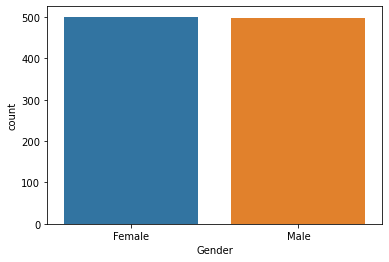

In [21]:
sns.countplot('Gender',data=d)
plt.show()

### Creating dummies for gender column for getting numeric data for seaborn bar plot

In [22]:
#creating a new data frame
gender_dummies=pd.get_dummies(d['Gender'])   # if male then 0 , if female 1
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


#### Joining original data with gender dummies data(gender_dummies)

In [23]:
d=pd.concat([d,gender_dummies],axis=1)

In [24]:
d.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


### Barplot

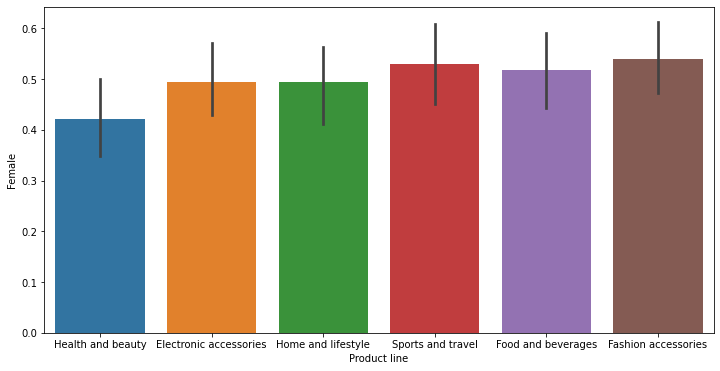

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Female',data=d)
plt.show()

In [ ]:
# Females have purchased more in fashion accesories

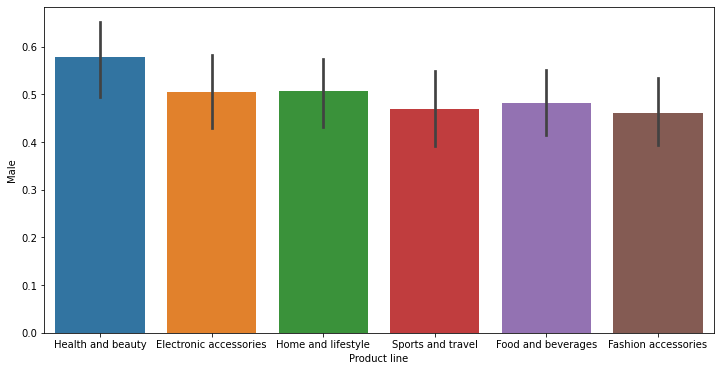

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Male',data=d)
plt.show()

### Plotting customers per city

In [8]:
d['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [9]:
place_d=pd.DataFrame(d['City'].value_counts())   # number of customers from each city
place_d

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

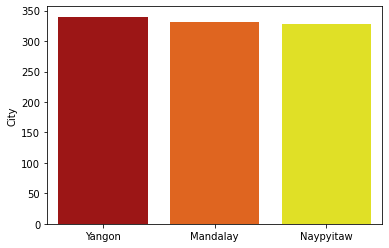

In [10]:
sns.barplot(x=place_d.index, y=place_d['City'], palette='hot')  

In [ ]:
# more shopping in yangon

In [35]:
payment_d=pd.DataFrame(d['Payment'].value_counts())
payment_d

,Payment
Ewallet,345
Cash,344
Credit card,311


In [ ]:
# Ewallet is the most popular payment option

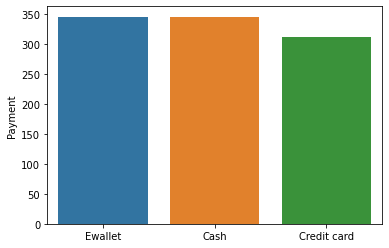

In [43]:
sns.barplot(x=payment_d.index , y=payment_d.Payment)
plt.show()

### Getting gross income plot for each product line

#### which product line is earning the most profit

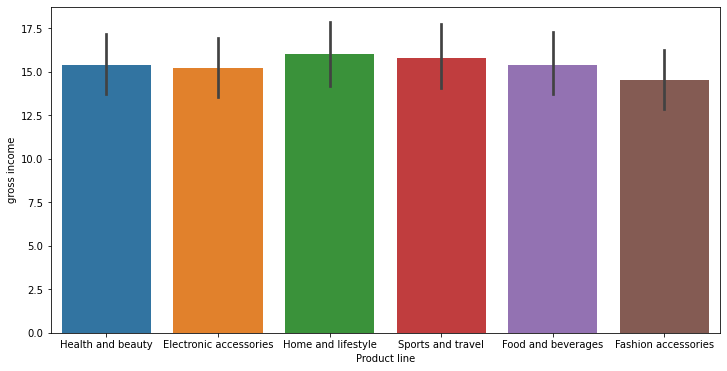

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=d['Product line'],y=d['gross income'])
plt.show()

In [ ]:
# largest profit is coming from home and lifestyle

### Getting rating plot for each product line

#### which product line has best ratings

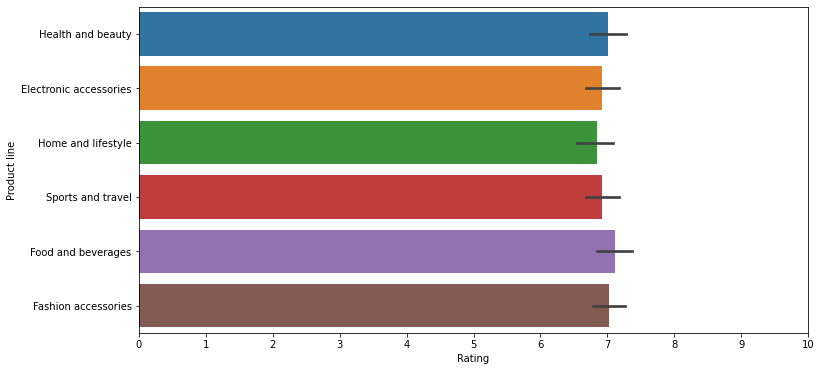

In [52]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.barplot(x=d['Rating'],y=d['Product line'])
plt.xticks(xdata)
plt.show()

In [ ]:
# food and beverages has highest rating

### Total bill in each product line

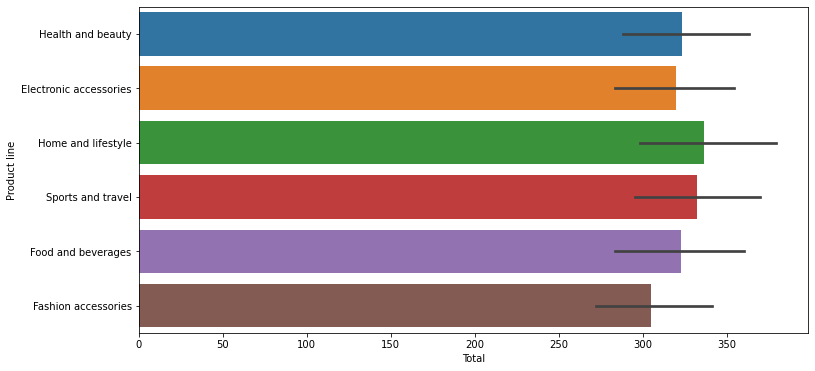

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=d['Total'],y=d['Product line'])
plt.show()

In [ ]:
# home and lifestyle has highest selling price..highest total bill

### Exploring quantity column

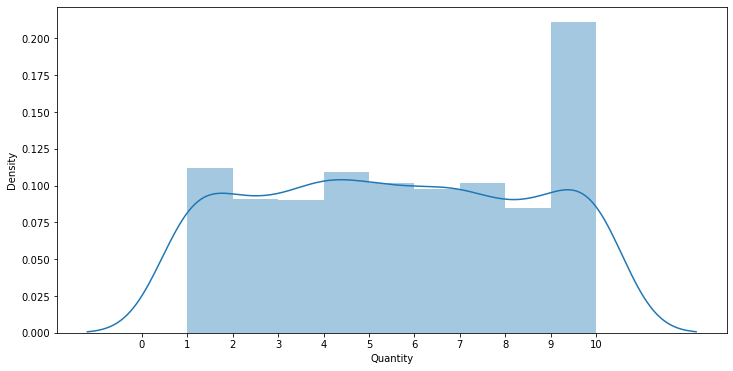

In [55]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.distplot(d['Quantity'])
plt.xticks(xdata)
plt.show()

In [ ]:
# most customers buy in 9-10 quantity

In [56]:
quantity_d=pd.DataFrame(d['Quantity'].value_counts())
quantity_d

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


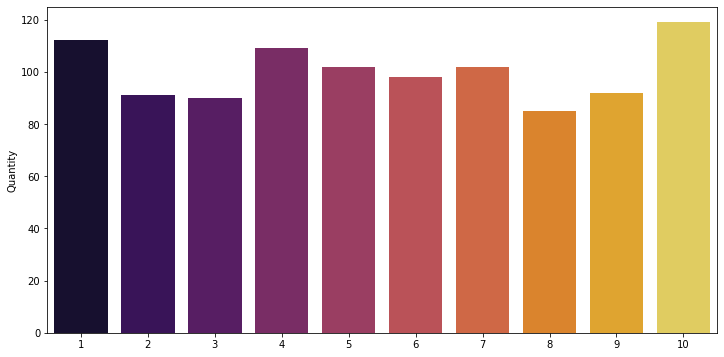

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x=quantity_d.index , y=quantity_d['Quantity'], palette='inferno') 
plt.show()

### Plotting heatmap to check if thers any correlation between columns

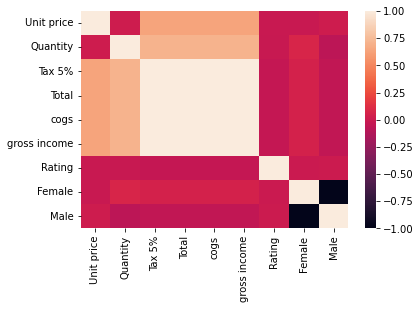

In [61]:
sns.heatmap(d.corr())  # the lighter the grid the higher will be the correlation, darker means lesser correlation
plt.show()

In [ ]:
# male and female columns not having any correlation..so its dark
# total and quantity are having high correlation

## Inferance from the analysis

In [ ]:
Total customers=1000
Total females=501
Total males=499
Min rating=4
Max rating=10
Average rating=6.97
Best avg rating is in food and beverages
Maximum average gross income in home and lifestyle
Minimum average gross income in fashion and accesories
Mximum customers buy 10 quantities
Max average total bill in home and lifestyle
Min average total bill in fasion accesories
Max people pay through e-wallet
Max people come from Yangon city
Max average sales of fashion accesories is from females
Max average sales of health and beauty is from males
